In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

import math
from sklearn import preprocessing, model_selection
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import scipy.stats as stats


In [2]:
df_belem = pd.read_csv("../input/temperature-timeseries-for-some-brazilian-cities/station_belem.csv")
df_curitiba = pd.read_csv("../input/temperature-timeseries-for-some-brazilian-cities/station_curitiba.csv")

In [3]:
#Questão 1
display(df_belem.shape, df_curitiba.shape)

(59, 18)

(59, 18)

In [4]:
#Questão 2
df_belem.set_index('YEAR',inplace=True)
df_curitiba.set_index('YEAR',inplace=True)
display(df_belem.head())
display(df_curitiba.head())

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,26.43,25.53,25.88,26.07,26.31,26.64,26.77,26.72,26.62,26.46,26.50,26.51,26.19,26.09,26.71,26.53,26.38
1962,26.30,26.06,26.15,26.04,26.83,26.74,26.71,26.94,26.87,26.80,26.68,26.91,26.29,26.34,26.80,26.78,26.55
1963,26.25,26.03,26.02,26.42,27.17,26.94,26.93,26.98,26.96,26.85,27.06,26.24,26.40,26.54,26.95,26.96,26.71
1964,25.70,25.52,25.41,25.75,26.55,26.91,27.16,27.34,27.32,999.90,999.90,999.90,25.82,25.90,27.14,999.90,26.39
1965,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,21.80,21.84,20.51,19.14,16.05,14.87,15.43,17.17,18.56,19.53,20.56,20.81,21.52,18.57,15.82,19.55,18.86
1962,20.47,20.29,20.78,17.42,14.49,12.19,12.29,14.85,16.46,15.48,19.07,20.01,20.52,17.56,13.11,17.00,17.05
1963,22.57,21.41,22.06,18.82,15.71,13.76,15.62,16.20,19.65,18.50,20.37,19.79,21.33,18.86,15.19,19.51,18.72
1964,21.33,21.57,20.29,19.26,15.46,13.03,12.08,14.97,16.93,17.28,17.76,19.47,20.90,18.34,13.36,17.32,17.48
1965,20.31,21.99,19.11,18.61,15.12,16.17,13.94,16.55,17.66,18.23,19.84,20.92,20.59,17.61,15.55,18.58,18.08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1d96fb780>,
      dtype=object)

<Figure size 1800x1800 with 0 Axes>

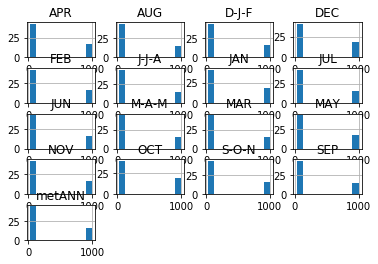

In [5]:
#exercício 3
#plota o histograma dos valores 
#vemos que há vários outliers próximos de 1000 que provavelmente não são valores de temperatura válidos
plt.figure(figsize=(25,25))
#df_belem.boxplot()
df_belem.hist()



In [6]:
#mostra a quantidade de valores únicos no mẽs de janeiro
#verificando os valores únicos confirmamos que o valor 999.90 é o único outlier
display(df_belem['JAN'].value_counts())
display(df_curitiba['JAN'].value_counts())

999.90    18
26.64      2
27.20      1
27.95      1
26.60      1
27.65      1
27.87      1
26.91      1
26.05      1
26.47      1
26.81      1
28.60      1
27.86      1
28.03      1
27.03      1
26.61      1
25.99      1
27.26      1
28.20      1
27.60      1
25.96      1
27.51      1
27.31      1
27.42      1
25.95      1
26.55      1
27.74      1
28.28      1
26.53      1
26.70      1
26.89      1
26.30      1
26.80      1
25.70      1
27.08      1
27.82      1
27.66      1
26.43      1
26.31      1
26.44      1
26.25      1
Name: JAN, dtype: int64

999.90    7
22.18     2
21.37     2
20.94     2
22.77     1
22.47     1
23.51     1
22.92     1
22.80     1
21.33     1
21.81     1
20.82     1
20.93     1
22.31     1
20.99     1
21.53     1
22.96     1
22.04     1
20.47     1
22.43     1
23.27     1
24.05     1
23.99     1
19.51     1
21.57     1
21.80     1
23.38     1
22.16     1
21.77     1
22.93     1
23.54     1
22.89     1
20.77     1
24.26     1
22.62     1
22.22     1
21.05     1
25.15     1
22.15     1
22.30     1
21.04     1
23.40     1
21.85     1
22.40     1
22.57     1
22.66     1
23.55     1
22.64     1
20.31     1
23.25     1
Name: JAN, dtype: int64

Através da análise acima, identificamos que há vários outliers com o valor 999.90. 
Minha conclusão é de que estes não são valores de temperatura válidos, e devem ser eliminados ou substituídos do dataframe.

In [7]:
#exercício 4
#para tratar os outliers, podemos excluir os dados ausentes (999.90) ou substituí-lo pela média do ano anterior e posterior.
#adotarei a solução de substituir os nulos pela média.


#cria um novo dataset transformando o outlier em nulo para aplicação das funções de tratamento
df_belem_t = df_belem.replace(999.90,np.nan)
#substitui os valores nulos restantes pela média do ano anterior e posterior
df_belem_t = df_belem_t.fillna(df_belem_t.mean())
display(df_belem_t)

#cria um novo dataset transformando o outlier em nulo para aplicação das funções de tratamento
df_curitiba_t = df_curitiba.replace(999.90,np.nan)
#substitui os valores nulos restantes pela média do ano anterior e posterior
df_curitiba_t = df_curitiba_t.fillna(df_curitiba_t.mean())
display(df_curitiba_t)


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,26.430000,25.530000,25.880000,26.070000,26.310000,26.640000,26.770000,26.720000,26.620000,26.460,26.500000,26.51000,26.190000,26.090,26.710000,26.530000,26.380000
1962,26.300000,26.060000,26.150000,26.040000,26.830000,26.740000,26.710000,26.940000,26.870000,26.800,26.680000,26.91000,26.290000,26.340,26.800000,26.780000,26.550000
1963,26.250000,26.030000,26.020000,26.420000,27.170000,26.940000,26.930000,26.980000,26.960000,26.850,27.060000,26.24000,26.400000,26.540,26.950000,26.960000,26.710000
1964,25.700000,25.520000,25.410000,25.750000,26.550000,26.910000,27.160000,27.340000,27.320000,27.706,27.812619,27.59475,25.820000,25.900,27.140000,27.714884,26.390000
1965,27.014634,26.913095,26.950227,27.260476,27.524762,27.511163,27.399302,27.607955,27.626818,27.706,27.812619,27.59475,27.143256,27.255,27.504318,27.714884,27.381364
1966,27.014634,26.913095,26.950227,27.260476,27.524762,27.511163,27.399302,27.607955,27.626818,27.706,27.812619,27.59475,27.143256,27.255,27.504318,27.714884,27.381364
1967,26.550000,25.990000,25.930000,26.240000,26.330000,26.430000,26.190000,26.000000,27.626818,26.010,26.420000,26.08000,26.480000,26.170,26.210000,26.170000,26.260000
1968,25.990000,26.913095,25.740000,27.260476,27.524762,26.380000,26.670000,26.760000,26.860000,26.940,26.870000,26.73000,25.900000,27.255,26.600000,26.890000,26.410000
1969,26.640000,27.110000,27.340000,27.580000,27.900000,27.720000,27.010000,27.270000,26.970000,27.060,27.210000,27.56000,26.830000,27.610,27.330000,27.080000,27.210000


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
YEAR,,,,,,,,,,,,,,,,,
1961,21.800000,21.840000,20.510000,19.140,16.05000,14.870000,15.4300,17.170000,18.560000,19.53000,20.5600,20.810000,21.520000,18.570000,15.820000,19.550000,18.860000
1962,20.470000,20.290000,20.780000,17.420,14.49000,12.190000,12.2900,14.850000,16.460000,15.48000,19.0700,20.010000,20.520000,17.560000,13.110000,17.000000,17.050000
1963,22.570000,21.410000,22.060000,18.820,15.71000,13.760000,15.6200,16.200000,19.650000,18.50000,20.3700,19.790000,21.330000,18.860000,15.190000,19.510000,18.720000
1964,21.330000,21.570000,20.290000,19.260,15.46000,13.030000,12.0800,14.970000,16.930000,17.28000,17.7600,19.470000,20.900000,18.340000,13.360000,17.320000,17.480000
1965,20.310000,21.990000,19.110000,18.610,15.12000,16.170000,13.9400,16.550000,17.660000,18.23000,19.8400,20.920000,20.590000,17.610000,15.550000,18.580000,18.080000
1966,22.300000,22.840000,21.360000,18.620,16.50000,15.380000,15.3000,14.070000,15.430000,17.32000,19.1900,21.130000,22.020000,18.830000,14.920000,17.310000,18.270000
1967,20.940000,21.390000,20.330000,19.100,17.76000,14.700000,15.0600,17.750000,17.510000,20.55000,19.9628,21.430566,21.150000,19.060000,15.840000,19.780000,18.960000
1968,22.233077,22.445192,21.419423,19.285,16.33902,14.913922,14.6468,15.915098,16.958431,18.48717,19.9628,21.740000,22.021321,19.019608,15.166078,18.472692,18.671765
1969,22.920000,22.750000,21.750000,18.290,16.03000,14.320000,14.6000,15.890000,18.150000,16.24000,20.3200,19.540000,22.470000,18.690000,14.940000,18.240000,18.580000


<Figure size 720x720 with 0 Axes>

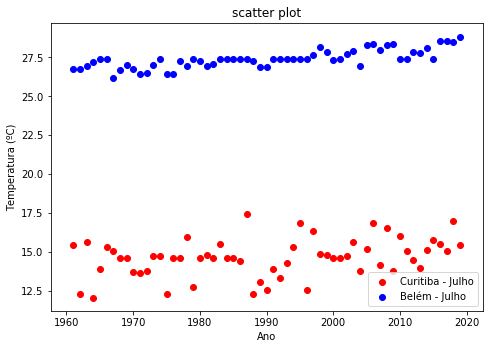

In [8]:
#exercício 5
plt.figure(figsize=(10,10))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_curitiba_t.index, df_curitiba_t.JUL, color='r')
ax.scatter(df_belem_t.index, df_belem_t.JUL, color='b')
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura (ºC)')
ax.legend(["Curitiba - Julho", "Belém - Julho"])
ax.set_title('scatter plot')
plt.show()

In [9]:
#questão 6
display(df_curitiba_t['JUL'].describe())
display(df_belem_t['JUL'].describe())
stats.f_oneway(df_belem_t['JUL'], df_curitiba_t['JUL'])

count    59.000000
mean     14.646800
std       1.224781
min      12.080000
25%      13.930000
50%      14.646800
75%      15.370000
max      17.450000
Name: JUL, dtype: float64

count    59.000000
mean     27.399302
std       0.591388
min      26.190000
25%      26.980000
50%      27.399302
75%      27.740000
max      28.800000
Name: JUL, dtype: float64

F_onewayResult(statistic=5186.945872562246, pvalue=3.891003972944908e-98)

In [10]:
#exercício 7
df_curitiba_jan = pd.DataFrame(df_curitiba_t['JAN'],columns=['JAN'])
#cria o dataset de previsão com os valores dos 3 anos anteriores
df_curitiba_jan['A1'] = df_curitiba_jan['JAN'].shift(1)
df_curitiba_jan['A2'] = df_curitiba_jan['JAN'].shift(2)
df_curitiba_jan['A3'] = df_curitiba_jan['JAN'].shift(3)
#dropa os primeiros anos (que não tem anos anteriores para montar o dataset)
df_curitiba_jan = df_curitiba_jan.dropna()
display(df_curitiba_jan.head())
#separa em conjuntos de teste e treinamento
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_curitiba_jan.drop(columns=['JAN']),df_curitiba_jan['JAN'],test_size=0.25, random_state=33)


,JAN,A1,A2,A3
YEAR,,,,
1964,21.330000,22.57,20.47,21.80
1965,20.310000,21.33,22.57,20.47
1966,22.300000,20.31,21.33,22.57
1967,20.940000,22.30,20.31,21.33
1968,22.233077,20.94,22.30,20.31


In [11]:
#realiza regressão com o regressor de gradient boosting XGBoost
#ele frequentemente apresenta resultados iniciais melhores que uma rede neural sem ajustes
model = xgb.XGBRegressor()
model.fit(X_train,y_train)
p_train = model.predict(data=X_train)
p_test = model.predict(data=X_test)

[21:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [12]:
#calcula os erros de previsão
trainScore = math.sqrt(mean_squared_error(p_train, y_train))
print('Pontuação para o treinamento: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(p_test, y_test))
print('Pontuação para o teste: %.2f RMSE' % (testScore))

Pontuação para o treinamento: 0.19 RMSE
Pontuação para o teste: 1.11 RMSE


,PRED,REAL
YEAR,,
1965,22.128042,20.310000
1968,22.189690,22.233077
1969,22.891705,22.920000
1970,21.901022,21.370000
1979,22.475342,19.510000
1990,22.296289,22.040000
1992,22.883045,22.800000
1996,23.707729,22.960000
2001,22.211382,22.233077


<Figure size 720x720 with 0 Axes>

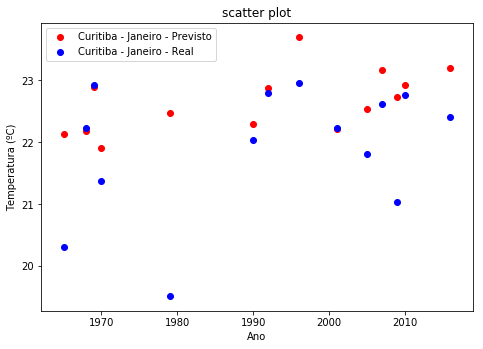

In [13]:
#plota o resultado previsto em relação ao real
df_plot = pd.DataFrame({'YEAR': X_test.index, 'PRED': p_test, 'REAL': y_test}).reset_index(drop=True)
display(df_plot.sort_values(['YEAR']).set_index('YEAR'))
plt.figure(figsize=(10,10))
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_plot['YEAR'],df_plot['PRED'] , color='r')
ax.scatter(df_plot['YEAR'],df_plot['REAL'] , color='b')
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura (ºC)')
ax.legend(["Curitiba - Janeiro - Previsto", "Curitiba - Janeiro - Real"])
ax.set_title('scatter plot')
plt.show()